#  brain tumor detection model using a **CONVOLUTIONAL NEURAL NETWORK (CNN)** 

### STEP 1: IMPORTING THE NECESARY LIBRARIES:

The code begins by importing the necessary libraries for data manipulation, visualization, and for building a Convolutional Neural Network (CNN) model 

In [6]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


### STEP 2: IMPORTING THE DATASET:


In [7]:
# Set the path to the dataset
dataset = "./brain_tumor_data"

# Define the categories
categories = ["glioma", "meningioma", "notumor", "pituitary"]


Here, the **dataset_path** variable is set to the root directory containing all the brain tumor MRI images.
The **categories** list defines the different types of brain tumors present in the dataset.





### STEP 3: LOADING AND PREPROCESSING THE DATASET: 

1. The code reads the images from each category in the main dataset directory, counts the number of images in each category, and creates a Pandas DataFrame (***df_counts***) to store the image counts by category.

2. A bar plot is generated to visualize the distribution of tumor types in the  dataset.


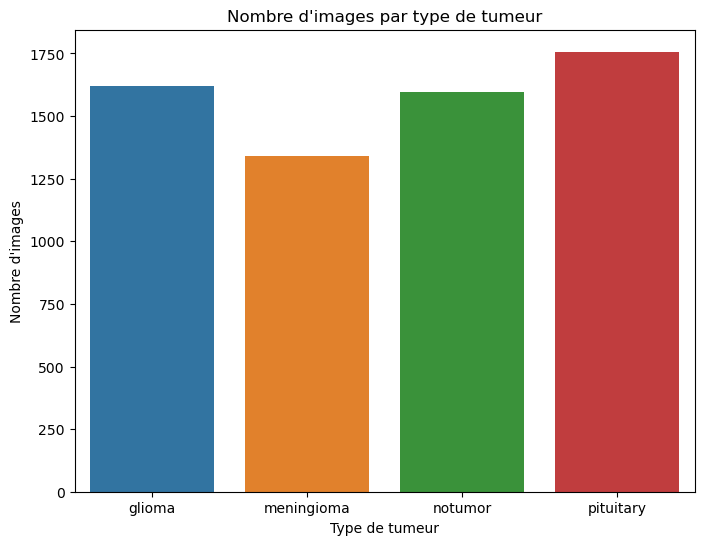

In [9]:
category_counts = []

# Compter le nombre d’images dans chaque catégorie
for category in categories:
    folder_path = os.path.join(dataset, category)
    if not os.path.exists(folder_path):
        print(f"⚠️ Dossier manquant : {folder_path}")
        continue
    
    num_images = len(os.listdir(folder_path))
    category_counts.append({"Category": category, "Count": num_images})

# Convertir en DataFrame
df_counts = pd.DataFrame(category_counts)

# Affichage du barplot
plt.figure(figsize=(8, 6))
sns.barplot(data=df_counts, x="Category", y="Count")
plt.title("Nombre d'images par type de tumeur")
plt.xlabel("Type de tumeur")
plt.ylabel("Nombre d'images")
plt.show()

In [13]:
!pip install opencv-python


  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [11]:
import cv2
image_size = (150, 150)

X = []
y = []

for idx, category in enumerate(categories):
    folder_path = os.path.join(dataset, category)
    for img_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, img_name)
        try:
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, image_size)
                X.append(img)
                y.append(idx)
            else:
                print(f"[SKIPPED - UNREADABLE] {file_path}")
        except Exception as e:
            print(f"[ERROR] {file_path} -> {e}")

X = np.array(X)
y = np.array(y)


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=len(categories))
y_test = to_categorical(y_test, num_classes=len(categories))



In [32]:
print(f"Train: {X_train.shape[0]} images")
print(f"Test: {X_test.shape[0]} images")

Train: 5049 images
Test: 1263 images


### STEP 4: VISUALIZING IMAGES FOR EACH TUMOR TYPES: 

Here, the code displays sample images for each tumor type using a grid of subplots.


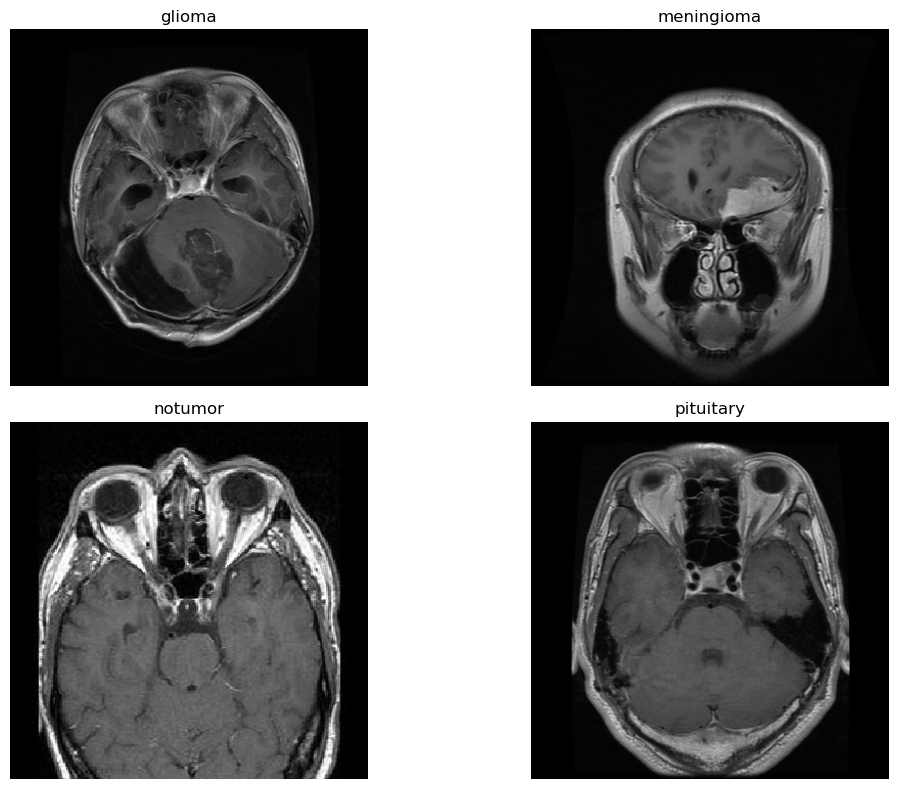

In [29]:
plt.figure(figsize=(12, 8))
for i, category in enumerate(categories):
    folder_path = os.path.join(dataset, category)
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    img = plt.imread(image_path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")
plt.tight_layout()
plt.show()

### STEP 5: SETTING UP THE IMAGE_SIZE, BATCH_SIZE AND EPOCHS FOR THE MODEL:

The ***image_size*** variable defines the desired size for the input images in the CNN. The ***batch_size*** specifies the number of images to be processed in each training batch, and ***epochs*** determines the number of times the entire training dataset is iterated during training.


In [30]:

# Set the image size
image_size = (150, 150)
# Set the batch size for training
batch_size = 64

# Set the number of epochs for training
epochs = 50

### STEP 6: BUILDING THE MODEL ARTITECHURE

In [18]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(len(categories), activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1. The model architecture is defined using a sequential model (**Sequential class**). It consists of a series of convolutional (**Conv2D**) and max pooling (**MaxPooling2D**) layers, followed by a **flattening layer**, two fully connected (**Dense**) layers, and a **dropout layer for regularization**. 
2. The activation function used for the convolutional layers is **ReLU**, except for the last dense layer, where **softmax activation** is used to output class probabilities.
3. The model is compiled with the **Adam optimizer**, which is an adaptive learning rate optimization algorithm. The loss function used is **categorical cross-entropy**, suitable for multi-class classification problems with **one-hot encoded labels**. 
4. The accuracy metric is also specified to monitor the model's performance during training.

In [19]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,454,660 (13.18 MB)

 Trainable params: 3,454,660 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    )

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 46s 549ms/step - accuracy: 0.5073 - loss: 10.4122
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 50s 628ms/step - accuracy: 0.7844 - loss: 0.5675
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 49s 620ms/step - accuracy: 0.8609 - loss: 0.3773
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 46s 587ms/step - accuracy: 0.8964 - loss: 0.2816
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 46s 581ms/step - accuracy: 0.9244 - loss: 0.2074
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 45s 565ms/step - accuracy: 0.9370 - loss: 0.1850
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 47s 594ms/step - accuracy: 0.9499 - loss: 0.1370
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 48s 607ms/step - accuracy: 0.9648 - loss: 0.0994
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 48s 602ms/step - accuracy: 0.9672 - loss: 0.0995
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 47s 589ms/step - accuracy: 0.9724 - loss: 0.0808
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 48s 605ms/step - accuracy: 0.9723 - loss: 0.0794
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4

### STEP 7: VISUALIZATION THROUGH GRAPH

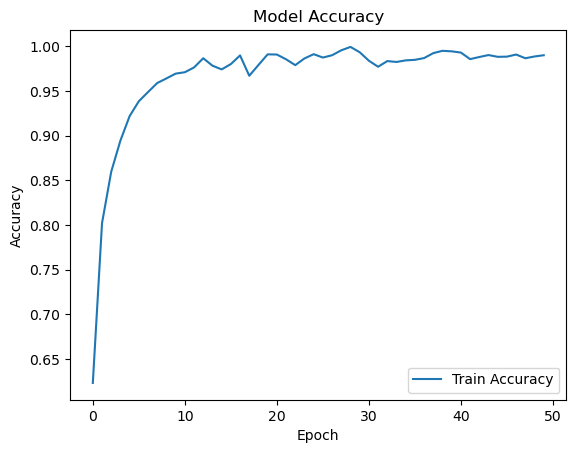

In [35]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This code plots the training and validation accuracy over epochs using the data stored in history. It helps visualize the model's learning progress and check for overfitting or underfitting.

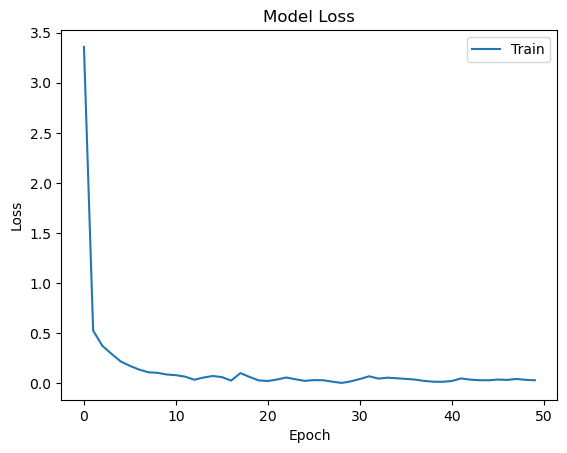

In [36]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

This code plots the training and validation loss over epochs using the data stored in **history**. It helps visualize how the model's loss decreases over time, indicating improved performance.



### STEP 9: EVALUATION

In [37]:
test_loss, test_acc = model.evaluate(X_test, y_test)  # Évaluation finale
print(f"Test accuracy: {test_acc}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.9464 - loss: 0.2930
Test accuracy: 0.9414093494415283


1. In the above evaluation ***model.evaluate*** (***X_test, y_test***) evaluates the trained model on the **test dataset**. It calculates the loss and accuracy of the model's predictions on the test data.

2. The ***loss*** represents the average error between the model’s predictions and the true labels in the test dataset. A lower loss indicates better performance.
3. The ***accuracy***  measures the proportion of correctly classified samples in the test set. A higher accuracy means the model is making more correct predictions.

4. In the given example, the **test loss** is **0.29630**, which means that, on average, the model's predictions deviate by a small margin from the true labels in the test dataset. The **test accuracy is 0.9414**, indicating that the model has achieved an **accuracy** of approximately **94.14% on the test data**, correctly classifying the tumor types in the majority of the cases.



In [25]:
# Save the trained model
model.save("brain_tumor_model.h5")
